**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        def dist (a, b):
            return np.sum((a-b)**2, axis = 1)**0.5

        def example_func(a):
            return np.unique(a)[np.unique(a, return_counts = 'True')[1].argmax()]

        pred = np.zeros(len(X))
        distance = np.zeros(len(self.X))
        j = 0
        if self.algorithm == 'brute':
            for testX in X:
                distance = dist(testX, self.X)
                neighb =  self.y[distance.argsort()][0:self.neighbors]
                pred[j] = np.unique(neighb, return_counts='True')[0][np.argmax(np.unique(neighb, return_counts='True')[1])]
                j+=1    

        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X, leaf_size=2)              
            dist, ind = tree.query(X, k=self.neighbors)
            pred = np.apply_along_axis(example_func , axis=1, arr=y_train[ind])     
        
        return pred

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
from sklearn.neighbors import KDTree
tree = KDTree(X_train, leaf_size=2)              
dist, ind = tree.query(X_test, k=2)   
def example_func(a):
   return np.unique(a)[np.unique(a, return_counts = 'True')[1].argmax()]
pred = np.apply_along_axis(example_func , axis=1, arr=y_train[ind])
pred

array([2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1])

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 670 µs, sys: 0 ns, total: 670 µs
Wall time: 523 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 3.53 ms


array([2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 1.89 ms, sys: 934 µs, total: 2.83 ms
Wall time: 2.93 ms


array([2., 1., 1., 2., 2., 0., 1., 0., 0., 0., 2., 1., 0., 1., 1.])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 4.64 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 6.44 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 3.16 ms, sys: 781 µs, total: 3.94 ms
Wall time: 4.71 ms


array([2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 2.49 ms, sys: 127 µs, total: 2.62 ms
Wall time: 2.57 ms


array([2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
vectorizer = CountVectorizer(max_features = 10000)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
kf = KFold(n_splits=3, shuffle = True)
for train, test in kf.split(X):
    print(train, test)

[    0     1     2 ... 11311 11312 11313] [    3     5     6 ... 11304 11306 11307]
[    3     5     6 ... 11308 11309 11310] [    0     1     2 ... 11311 11312 11313]
[    0     1     2 ... 11311 11312 11313] [    7     8    10 ... 11308 11309 11310]


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def score_euc(X ,y , n_neighbours):
    clf = KNeighborsClassifier(n_neighbors=n_neighbours, algorithm='brute', metric='euclidean')
    pred = []
    for train, test in kf.split(X):
        clf.fit(X[train], y[train])
        pred.append(accuracy_score(y[test], clf.predict(X[test])))
    return np.mean(pred)

In [25]:
scores_euc = []
for i in range(1,31):
    scores_euc.append(score_euc(X, target, i))

In [26]:
optimal = np.argmax(scores_euc) + 1
print ('Оптимальное количество соседей: ', optimal)

Оптимальное количество соседей:  1


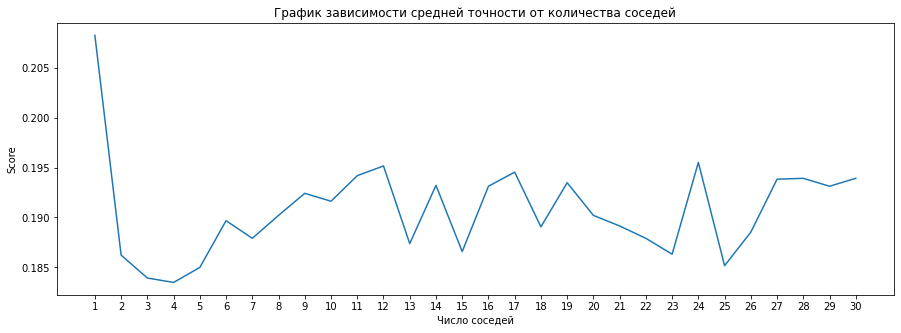

In [27]:
plt.figure(figsize=(15, 5))
plt.title("График зависимости средней точности от количества соседей")
plt.xticks(range(1,31))
plt.plot(range(1,31), scores_euc)
plt.xlabel('Число соседей')
plt.ylabel('Score')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [28]:
def score_cos(X ,y , n_neighbours):
    clf = KNeighborsClassifier(n_neighbors=n_neighbours, algorithm='brute', metric='cosine')
    pred = []
    for train, test in kf.split(X):
        clf.fit(X[train], y[train])
        pred.append(accuracy_score(y[test], clf.predict(X[test])))
    return np.mean(pred)

In [29]:
scores_cos = []
for i in range(1,31):
    scores_cos.append(score_cos(X, target, i))

In [30]:
vectorizer2 = TfidfVectorizer(max_features = 10000)
X2 = vectorizer2.fit_transform(data)
scores_TfIdf_euc = []
scores_TfIdf_cos = []
for i in range(1,31):
    scores_TfIdf_cos.append(score_cos(X2, target, i))
for i in range(1,31):
    scores_TfIdf_euc.append(score_euc(X2, target, i))

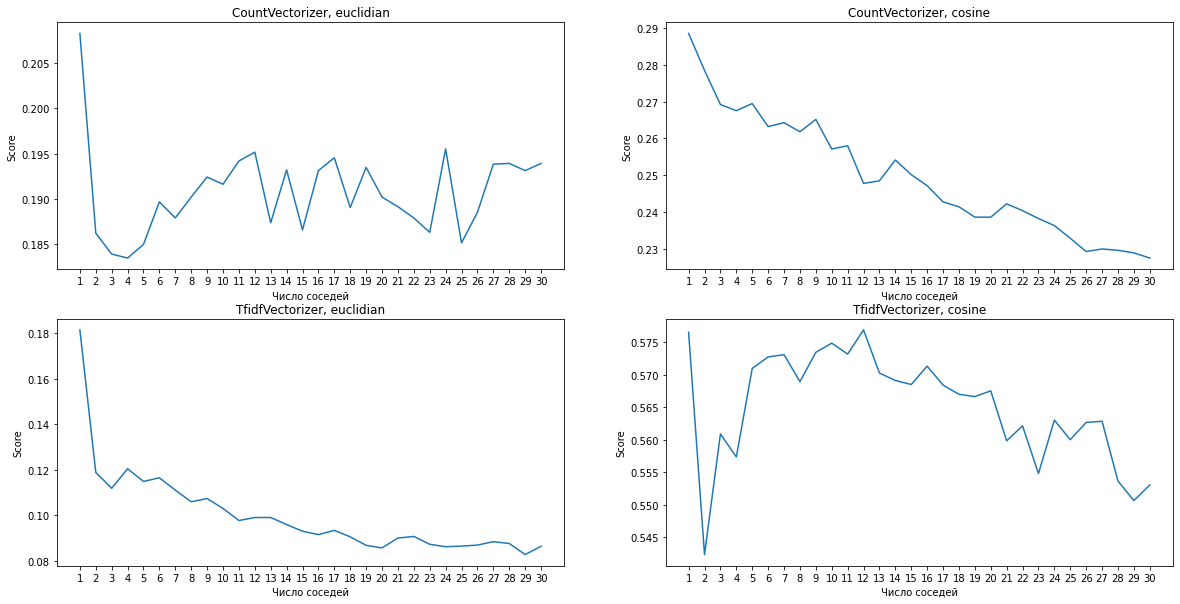

In [31]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("CountVectorizer, euclidian")
plt.xticks(range(1,31))
plt.plot(range(1,31), scores_euc)
plt.xlabel('Число соседей')
plt.ylabel('Score')

plt.subplot(2, 2, 2)
plt.title("CountVectorizer, cosine")
plt.xticks(range(1,31))
plt.plot(range(1,31), scores_cos)
plt.xlabel('Число соседей')
plt.ylabel('Score')

plt.subplot(2, 2, 3)
plt.title("TfidfVectorizer, euclidian")
plt.xticks(range(1,31))
plt.plot(range(1,31), scores_TfIdf_euc)
plt.xlabel('Число соседей')
plt.ylabel('Score')

plt.subplot(2, 2, 4)
plt.title("TfidfVectorizer, cosine")
plt.xticks(range(1,31))
plt.plot(range(1,31), scores_TfIdf_cos)
plt.xlabel('Число соседей')
plt.ylabel('Score')

plt.show()

In [32]:
d = {}
names = ["CountVectorizer, euclidian", "TfidfVectorizer, euclidian", "CountVectorizer, cosine", "TfidfVectorizer, cosine"]
d["CountVectorizer, euclidian"] = scores_euc
d["TfidfVectorizer, euclidian"] = scores_TfIdf_euc
d["CountVectorizer, cosine"] = scores_cos
d["TfidfVectorizer, cosine"] = scores_TfIdf_cos
opt1 = names[np.argmax([max(d["CountVectorizer, euclidian"]), max(d["CountVectorizer, cosine"]), max(d["TfidfVectorizer, euclidian"]), max(d["TfidfVectorizer, cosine"])])]
opt2 = np.argmax(d[opt1]) + 1
print('Оптимальная модель: ', opt1, ' с количеством соседей :', opt2)

Оптимальная модель:  TfidfVectorizer, cosine  с количеством соседей : 12


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [33]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [35]:
data2 = newsgroups_test['data']
target2 = newsgroups_test['target']
X3 = vectorizer2.fit_transform(data2)
clf = KNeighborsClassifier(n_neighbors=opt2, algorithm='brute', metric='cosine')
clf.fit(X2,target)
accuracy_score(target2, clf.predict(X3))

0.060807222517259694


**Вывод:** Точность на тестовой выборке сильно меньше, так как тест и трейн выборки могут достаточно сильно отличаться. В случае с кросс - валидацией мы берём части одной и той же выборки, в то время как тест может быть другим.
